<a href="https://colab.research.google.com/github/llillard99/LinearReg/blob/master/Sports_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/cbb.csv')
df = df[[x for x in list(df) if x != 'CONF']]
df = df[[x for x in list(df) if x != 'WAB']]
df['Win%'] = df['W'] / df['G']

In [ ]:
df['EFG_Ratio'] = (df['EFG_O'] - df['EFG_D']) / (df['EFG_O'] + df['EFG_D'])
df['3P_ODRatio'] = (df['3P_O'] - df['3P_D']) / (df['3P_O'] + df['3P_D'])
df['2P_ODRatio'] = (df['2P_O'] - df['2P_D']) / (df['2P_O'] + df['2P_D'])
df['FTR_Ratio'] = (df['FTR'] - df['FTRD']) / (df['FTR'] + df['FTRD'])

df = df[[x for x in list(df) if x != 'EFG_O']]
df = df[[x for x in list(df) if x != 'EFG_D']]
df = df[[x for x in list(df) if x != 'W']]
df = df[[x for x in list(df) if x != 'TORD']]
df = df[[x for x in list(df) if x != '2P_O']]
df = df[[x for x in list(df) if x != '2P_D']]
df = df[[x for x in list(df) if x != '3P_O']]
df = df[[x for x in list(df) if x != '3P_D']]
df = df[[x for x in list(df) if x != 'TFR']]
df = df[[x for x in list(df) if x != 'TFRD']]
df = df[[x for x in list(df) if x != 'ADJ_T_Scaled']]


In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[['ADJOE', 'ADJDE', 'BARTHAG', 'Win%', 'EFG_Ratio', '3P_ODRatio', '3P_ODRatio', 'FTR_Ratio', 'TOR', 'ORB', 'DRB']])

In [ ]:
df_scaled = pd.DataFrame(data = scaled)

In [ ]:
inputvars = ['ADJOE', 'ADJDE', 'BARTHAG', 'Win%', 'EFG_Ratio', '3P_ODRatio', '3P_ODRatio', 'FTR_Ratio', 'TOR', 'ORB', 'DRB']

columns = [x +'_scaled' for x in inputvars]

In [ ]:
df_scaled = pd.DataFrame(data = scaled, columns = columns)
df_scaled

,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled
0,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273
1,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909
2,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455
3,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182
4,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545
...,...,...,...,...,...,...,...,...,...,...,...
1752,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545
1753,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636
1754,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364
1755,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455


In [ ]:
df = df[[x for x in list(df) if x != 'ADJ_T']]

In [ ]:
df = df[[x for x in list(df) if x != 'FTR_Ratio_scaled']]
df = df[[x for x in list(df) if x != 'ORB']]

In [ ]:
df = df.join(df_scaled)
df

,TEAM,G,ADJOE,ADJDE,BARTHAG,TOR,DRB,FTR,FTRD,POSTSEASON,SEED,YEAR,Win%,EFG_Ratio,3P_ODRatio,2P_ODRatio,FTR_Ratio,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled
0,North Carolina,40,123.3,94.9,0.9531,15.4,30.0,32.3,30.4,2ND,1.0,2016,0.825000,0.044687,-0.050798,0.094416,0.030303,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273
1,Wisconsin,40,129.1,93.6,0.9758,12.4,23.7,36.2,22.4,2ND,1.0,2015,0.900000,0.069268,-0.013514,0.101508,0.235495,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909
2,Michigan,40,114.4,90.4,0.9375,14.0,24.9,30.7,30.0,2ND,3.0,2018,0.825000,0.061024,0.029240,0.077833,0.011532,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455
3,Texas Tech,38,115.2,85.2,0.9696,17.7,28.7,32.9,36.6,2ND,3.0,2019,0.815789,0.108808,0.102719,0.115100,-0.053237,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182
4,Gonzaga,39,117.8,86.3,0.9728,16.2,26.2,39.0,26.9,2ND,1.0,2017,0.948718,0.158649,0.136905,0.169263,0.183612,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,35,111.2,94.7,0.8640,19.2,27.3,32.0,27.6,S16,7.0,2018,0.628571,0.045778,0.004580,0.069246,0.073826,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545
1753,LSU,35,117.9,96.6,0.9081,17.9,30.8,37.1,33.1,S16,3.0,2019,0.800000,0.012859,-0.027439,0.034213,0.056980,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636
1754,Tennessee,36,122.8,95.2,0.9488,15.8,30.2,33.3,34.9,S16,2.0,2019,0.861111,0.069632,0.018031,0.106893,-0.023460,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364
1755,Gonzaga,35,117.4,94.5,0.9238,17.1,26.0,34.4,28.1,S16,11.0,2016,0.771429,0.104000,0.110132,0.100304,0.100800,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455


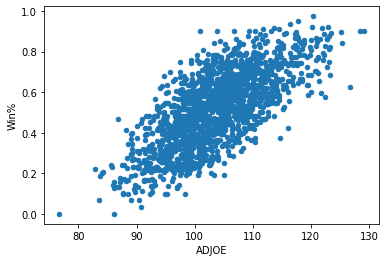

In [ ]:
df.plot(kind= 'scatter', x = 'ADJOE', y = 'Win%')

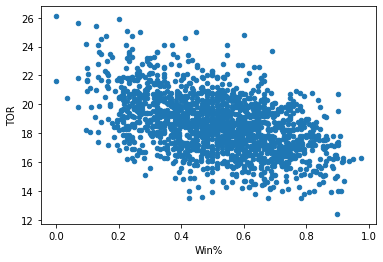

In [ ]:
df.plot(kind= 'scatter', x = 'Win%', y = 'TOR')

In [ ]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()
 
X = df[['BARTHAG_scaled', 'EFG_Ratio_scaled', '3P_ODRatio_scaled', '3P_ODRatio_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled', 'ADJOE_scaled', 'TOR_scaled', 'ORB_scaled', 'DRB_scaled']]
y = df['Win%']

LR.fit(X, y)

df['prediction'] = LR.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(df['Win%'],df['prediction'])
 
np.sqrt(mean_squared_error(df['Win%'],df['prediction']))

0.08437037661557063

In [ ]:
df = df.loc[~df['POSTSEASON'].isnull()]

In [ ]:
from sklearn.cluster import KMeans
 
X = df[['BARTHAG','FTR_Ratio_scaled','Win%_scaled', 'ADJOE_scaled', 'SEED']]
 
kmeans = KMeans(n_clusters = 3)
df['kmeans_clusters'] = kmeans.fit_predict(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df[['BARTHAG_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled','Win%_scaled', 'kmeans_clusters']]
y = df['POSTSEASON']

KNN.fit(X, y)
 
df['prediction2'] = KNN.predict(X)
df[['POSTSEASON','prediction2']].sample(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,POSTSEASON,prediction2
1639,R64,R64
1657,R64,R64
1631,R64,R64
38,F4,R32
1485,R32,R32
1525,R32,R32
1468,R32,R32
1701,R68,R64
1544,R64,R64
1506,R32,R32


In [ ]:
from sklearn.utils import shuffle

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

KNN = KNeighborsClassifier(n_neighbors=10)
 
X = df[['BARTHAG_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled','Win%_scaled', 'kmeans_clusters']]
y = df['POSTSEASON']
 
cv = KFold(n_splits=3, shuffle=False)
 
print(cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro'))

[0.         0.17007637 0.11202186]


In [ ]:
print(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro'))

[0.23377825 0.29525615 0.17492877 0.33764098 0.39811368]


In [ ]:
import numpy as np
 
scores = cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro')
print(np.mean(scores))

0.09403274401047422


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df['POSTSEASON'],df['prediction2']))
print(recall_score(df['POSTSEASON'],df['prediction2'],average='macro'))
print(f1_score(df['POSTSEASON'],df['prediction2'],average='macro'))

0.6294117647058823
0.40625
0.42795615205372856


In [ ]:
df_train = df.sample(300)
df_holdout = df.drop(df_train.index)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)
 
X_train = df_train[['BARTHAG_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled','Win%_scaled', 'kmeans_clusters']]
y_train = df_train['POSTSEASON']
 
cv = KFold(n_splits=5, shuffle=False,random_state=1)
 
scores = cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro')
 
print(np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.11331355412730733


In [ ]:
from sklearn.metrics import f1_score
 
X_holdout = df_holdout[['BARTHAG_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled','Win%_scaled', 'kmeans_clusters']]
KNN.fit(X_train,y_train)
df_holdout['prediction2'] = KNN.predict(X_holdout)
 
print(f1_score(df_holdout['POSTSEASON'],df_holdout['prediction2'],average='macro'))

0.3133116883116883


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [ ]:
sfs = SFS(KNN, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

{1: {'avg_score': 0.2463645650666157,
  'ci_bound': 0.06029475800601113,
  'cv_scores': array([0.17504006, 0.30179853, 0.21793249, 0.24558416, 0.29146758]),
  'feature_idx': (0,),
  'feature_names': ('BARTHAG_scaled',),
  'std_dev': 0.04691137013977718,
  'std_err': 0.02345568506988859},
 2: {'avg_score': 0.24669817291888857,
  'ci_bound': 0.0937508165889722,
  'cv_scores': array([0.1900319 , 0.27631388, 0.13926762, 0.28287338, 0.3450041 ]),
  'feature_idx': (0, 1),
  'feature_names': ('BARTHAG_scaled', 'FTR_Ratio_scaled'),
  'std_dev': 0.07294132032959114,
  'std_err': 0.03647066016479557},
 3: {'avg_score': 0.25875438715546534,
  'ci_bound': 0.06895172746063064,
  'cv_scores': array([0.16121324, 0.25250627, 0.27361111, 0.28503617, 0.32140516]),
  'feature_idx': (0, 1, 4),
  'feature_names': ('BARTHAG_scaled', 'FTR_Ratio_scaled', 'kmeans_clusters'),
  'std_dev': 0.05364678648117643,
  'std_err': 0.02682339324058821},
 4: {'avg_score': 0.2797586902557278,
  'ci_bound': 0.09777577909063

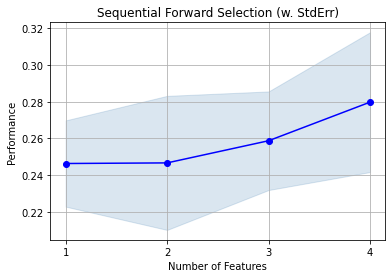

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
df[['POSTSEASON','prediction2']].sample(50)

,POSTSEASON,prediction2
1665,R64,R64
1557,R64,R64
1570,R64,R64
1460,R32,R32
1734,S16,S16
1661,R64,R68
1724,S16,2ND
37,F4,E8
1698,R68,R64
5,Champions,R32


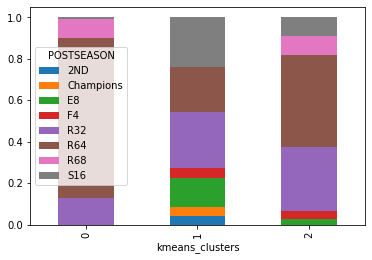

In [ ]:
pd.crosstab(df.kmeans_clusters, df.POSTSEASON).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

In [ ]:
df2014 = pd.read_csv('/content/gdrive/My Drive/2014MM.csv')
df2015 = df.loc[df.YEAR == 2015]
df2016 = df.loc[df.YEAR == 2016]
df2017 = df.loc[df.YEAR == 2017]
df2018 = df.loc[df.YEAR == 2018]
df2019 = df.loc[df.YEAR == 2019]

In [ ]:
for i in (df2017['TEAM'].unique()):
  temp = df2016.loc[df2016.TEAM == i]
  if len(temp) == 0:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2017), 'LASTYEARPERF'] = 'NotInTourney'
  else:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2017), 'LASTYEARPERF'] = temp['POSTSEASON'].iloc[0]

for i in (df2016['TEAM'].unique()):
  temp = df2015.loc[df2015.TEAM == i]
  if len(temp) == 0:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2016), 'LASTYEARPERF'] = 'NotInTourney'
  else:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2016), 'LASTYEARPERF'] = temp['POSTSEASON'].iloc[0]

for i in (df2018['TEAM'].unique()):
  temp = df2017.loc[df2017.TEAM == i]
  if len(temp) == 0:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2018), 'LASTYEARPERF'] = 'NotInTourney'
  else:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2018), 'LASTYEARPERF'] = temp['POSTSEASON'].iloc[0]

for i in (df2019['TEAM'].unique()):
  temp = df2018.loc[df2018.TEAM == i]
  if len(temp) == 0:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2019), 'LASTYEARPERF'] = 'NotInTourney'
  else:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2019), 'LASTYEARPERF'] = temp['POSTSEASON'].iloc[0]

for i in (df2015['TEAM'].unique()):
  temp = df2014.loc[df2014.TEAM == i]
  if len(temp) == 0:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2015), 'LASTYEARPERF'] = 'NotInTourney'
  else:
   df.loc[(df['TEAM'] == i) & (df['YEAR'] == 2015), 'LASTYEARPERF'] = temp['POSTSEASON'].iloc[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df.loc[df['LASTYEARPERF'] == 'Champions', 'LASTYEARPERF'] = 1
df.loc[df['LASTYEARPERF'] == '2ND', 'LASTYEARPERF'] = 2
df.loc[df['LASTYEARPERF'] == 'F4', 'LASTYEARPERF'] = 3
df.loc[df['LASTYEARPERF'] == 'E8', 'LASTYEARPERF'] = 4
df.loc[df['LASTYEARPERF'] == 'S16', 'LASTYEARPERF'] = 5
df.loc[df['LASTYEARPERF'] == 'R32', 'LASTYEARPERF'] = 6
df.loc[df['LASTYEARPERF'] == 'R64', 'LASTYEARPERF'] = 7
df.loc[df['LASTYEARPERF'] == 'R68', 'LASTYEARPERF'] = 8
df.loc[df['LASTYEARPERF'] == 'NotInTourney', 'LASTYEARPERF'] = 9


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df

,TEAM,G,ADJOE,ADJDE,BARTHAG,TOR,DRB,FTR,FTRD,POSTSEASON,SEED,YEAR,Win%,EFG_Ratio,3P_ODRatio,2P_ODRatio,FTR_Ratio,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled,prediction,kmeans_clusters,prediction2,LASTYEARPERF
0,North Carolina,40,123.3,94.9,0.9531,15.4,30.0,32.3,30.4,2ND,1.0,2016,0.825000,0.044687,-0.050798,0.094416,0.030303,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273,0.772216,1,S16,5
1,Wisconsin,40,129.1,93.6,0.9758,12.4,23.7,36.2,22.4,2ND,1.0,2015,0.900000,0.069268,-0.013514,0.101508,0.235495,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909,0.867940,1,2ND,3
2,Michigan,40,114.4,90.4,0.9375,14.0,24.9,30.7,30.0,2ND,3.0,2018,0.825000,0.061024,0.029240,0.077833,0.011532,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455,0.777892,1,S16,5
3,Texas Tech,38,115.2,85.2,0.9696,17.7,28.7,32.9,36.6,2ND,3.0,2019,0.815789,0.108808,0.102719,0.115100,-0.053237,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182,0.805643,1,R32,4
4,Gonzaga,39,117.8,86.3,0.9728,16.2,26.2,39.0,26.9,2ND,1.0,2017,0.948718,0.158649,0.136905,0.169263,0.183612,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545,1.022524,1,R32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,35,111.2,94.7,0.8640,19.2,27.3,32.0,27.6,S16,7.0,2018,0.628571,0.045778,0.004580,0.069246,0.073826,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545,0.691763,2,S16,9
1753,LSU,35,117.9,96.6,0.9081,17.9,30.8,37.1,33.1,S16,3.0,2019,0.800000,0.012859,-0.027439,0.034213,0.056980,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636,0.622119,1,S16,9
1754,Tennessee,36,122.8,95.2,0.9488,15.8,30.2,33.3,34.9,S16,2.0,2019,0.861111,0.069632,0.018031,0.106893,-0.023460,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364,0.741796,1,S16,6
1755,Gonzaga,35,117.4,94.5,0.9238,17.1,26.0,34.4,28.1,S16,11.0,2016,0.771429,0.104000,0.110132,0.100304,0.100800,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455,0.879821,2,S16,4
